# Deep Learning in Virtual Screening: Recent Applications and Developments
## Review

### Figure generation
#### Complex encoding

In [1]:
import nglview as nv

In [2]:
pdb_id = "2esm"

In [3]:
# show the complex based on PDB ID
ngl_viewer = nv.show_pdbid(pdb_id)

In [4]:
# add the ligands
ngl_viewer.add_representation(repr_type="ball+stick",
                              selection="hetero and not water")

In [5]:
# center view on binding site
ngl_viewer.center("ligand")
ngl_viewer

NGLWidget()

In [6]:
# render a static image
ngl_viewer.render_image(trim=True, factor=2, transparent=True);

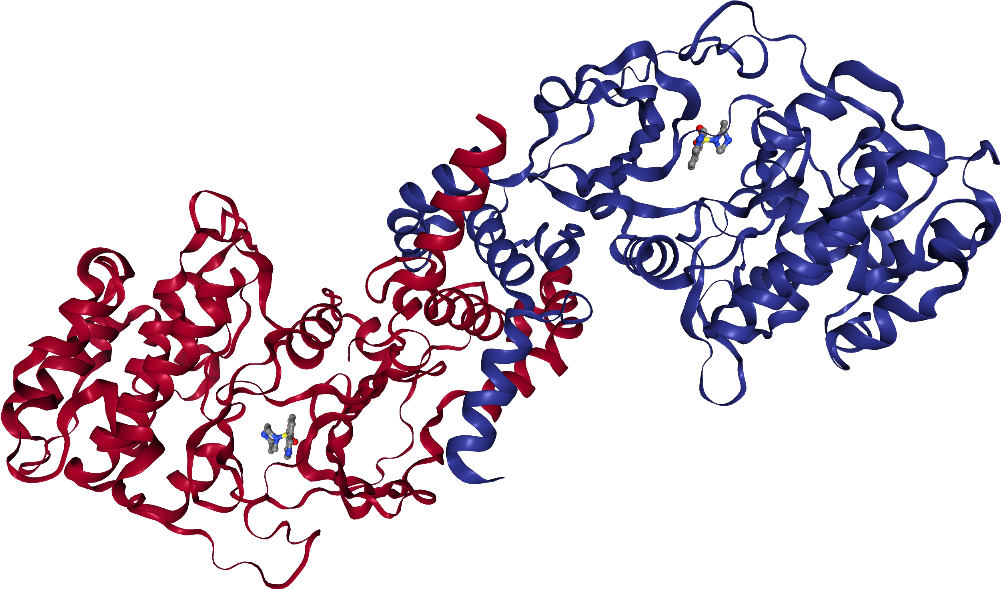

In [8]:
ngl_viewer._display_image()